In [1]:
import pandas as pd ,numpy as np

In [2]:
survey=pd.read_excel('MLOPSDATA.xlsx',sheet_name="Data")
desc=pd.read_excel('MLOPSDATA.xlsx')


In [3]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [4]:
desc

,Column,Description
0,response_id,Unique id for each sample (respondent).
1,collection_date,Date on which the sample was collected.
2,urban_rural,Whether the respodent belongs to a rural or ur...
3,education,The education qualitfication of the repondent
4,income,Income of the respondent.
5,Vote_Now,"If elections are held today, which party will ..."
6,Past_Vote,Which party did the respondent vote for in the...
7,CM_satisfaction,How satisfied is the respondent with the perfo...
8,MLA_satisfaction,How satisfied is the respondent with the perfo...
9,age,The age of the respondent.


In [5]:
survey.dtypes

response_id                  int64
collection_date     datetime64[ns]
urban_rural                 object
education                   object
income                      object
Vote_Now                    object
Past_Vote                   object
CM_satisfaction             object
MLA_satisfaction            object
age                         object
gender                      object
assembly_no                  int64
category                    object
weight                     float64
dtype: object

In [6]:
#2
survey.groupby('collection_date').count()['response_id']

collection_date
2020-08-24    1479
2020-08-25     998
2020-08-26     598
2020-08-27     665
2020-08-28     761
2020-08-29     620
2020-08-30     582
2020-08-31     557
2020-09-01     607
Name: response_id, dtype: int64

In [7]:
def to_num(e):
    try:
        return int(e)
    except:
        return np.nan
    

In [10]:
survey=survey.dropna()

In [11]:
#3
survey['age']=survey['age'].apply(to_num)
len(survey[survey['age'] <45])/len(survey)


0.9318380425284009

In [16]:
def age_group(e):
    if(e in range(18,25)):
        return "18-25"
    if(e in range(25,40)):
        return "25-40"
    if(e in range(40,55)):
        return "40-55"
    if(e in range(55,120)):
        return "55+"
        
        

In [17]:
#4
survey['age-group']=survey['age'].apply(age_group)
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age-group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-40
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25


In [26]:
survey

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age-group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-40
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329,25-40
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780,25-40
6864,6865,2020-09-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926,18-25
6865,6866,2020-09-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137,18-25


In [21]:
#5
_5=survey.groupby('age-group').count()
_5

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
age-group,,,,,,,,,,,,,,
18-25,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093
25-40,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844
40-55,801,801,801,801,801,801,801,801,801,801,801,801,801,801
55+,128,128,128,128,128,128,128,128,128,128,128,128,128,128


In [33]:
#5
print("Max ",max(_5["response_id"]))

Max  3844


In [38]:
#6
print("Ans",len(survey[(survey['Past_Vote']=='RJD') & (survey['Vote_Now']=='RJD')])/len(survey))

Ans 0.1181182639091174


In [62]:
#7
FS=survey[survey['CM_satisfaction'] == "Fully Satisfied"].groupby('collection_date').size()
FS=list(FS)
TT=survey.groupby('collection_date').size()
TT=list(TT)
import numpy as np
np.array(FS) / np.array(TT)

array([0.09810555, 0.09519038, 0.09866221, 0.08120301, 0.12089356,
       0.11774194, 0.11168385, 0.11131059, 0.12355848])

In [69]:
#8
FS=survey[survey['MLA_satisfaction'] == "Fully Dissatisfied"].groupby('collection_date').size()
FS=list(FS)
TT=survey.groupby('collection_date').size()
TT=list(TT)
import numpy as np
MLA_Dis=np.array(FS) / np.array(TT)

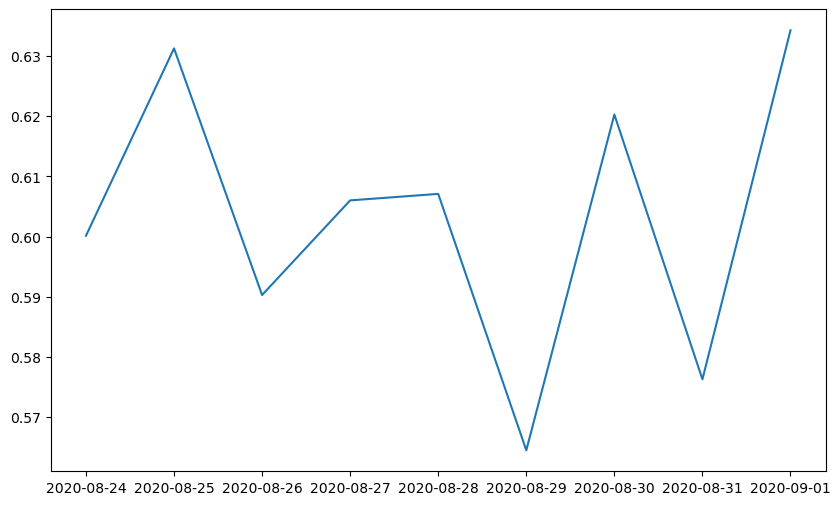

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) 
plt.plot(survey['collection_date'].unique(),MLA_Dis)

In [76]:
#9
pivot_table_result = pd.pivot_table(survey, 
                                    index='Past_Vote', 
                                    columns='Vote_Now', 
                                    aggfunc='size', 
                                    fill_value=0)

pivot_table_result



Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7,1,1630,3,5,42,101,110,44,13,194,32,87,370,88,24,62,10
BSP,0,1,2,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Did not vote,8,5,231,2,1,22,41,69,10,16,83,11,51,195,20,3,31,5
HAM,2,0,25,0,1,0,3,2,2,0,4,0,0,6,4,0,1,0
INC,0,6,6,0,0,57,10,9,0,3,6,3,3,100,1,2,7,0
JAP(L),0,0,4,0,0,0,35,0,0,0,0,1,0,2,0,0,0,0
JD(U),6,10,254,2,2,45,72,279,29,9,90,18,43,435,13,25,36,6
LJP,0,0,76,1,0,4,3,6,9,2,3,0,2,17,1,0,1,0
Left Front,0,1,2,0,0,1,0,0,0,18,1,1,0,4,0,1,0,1


In [77]:
crosstab_result = pd.crosstab(survey['Past_Vote'], survey['Vote_Now'])
crosstab_result

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7,1,1630,3,5,42,101,110,44,13,194,32,87,370,88,24,62,10
BSP,0,1,2,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Did not vote,8,5,231,2,1,22,41,69,10,16,83,11,51,195,20,3,31,5
HAM,2,0,25,0,1,0,3,2,2,0,4,0,0,6,4,0,1,0
INC,0,6,6,0,0,57,10,9,0,3,6,3,3,100,1,2,7,0
JAP(L),0,0,4,0,0,0,35,0,0,0,0,1,0,2,0,0,0,0
JD(U),6,10,254,2,2,45,72,279,29,9,90,18,43,435,13,25,36,6
LJP,0,0,76,1,0,4,3,6,9,2,3,0,2,17,1,0,1,0
Left Front,0,1,2,0,0,1,0,0,0,18,1,1,0,4,0,1,0,1


In [78]:
#10
pivot_table_result = pd.pivot_table(survey, 
                                    index='Past_Vote', 
                                    columns='Vote_Now', 
                                    values='weight', 
                                    aggfunc='sum', 
                                    fill_value=0)

pivot_table_result

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,0.000000,1.654731,5.174487,32.010277,0.000000,2.298223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,0.000000,25.348884,0.000000,1.648856,0.000000,0.712161,1.006719,2.496424,0.000000,0.928984,0.000000,0.000000,7.713008,1.903148,0.000000,0.039564,0.000000
INC,0.000000,11.105958,1.642875,0.000000,0.000000,161.742302,18.942597,11.077323,0.000000,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,0.000000
JAP(L),0.000000,0.000000,6.512846,0.000000,0.000000,0.000000,57.876224,0.000000,0.000000,0.000000,0.000000,3.195682,0.000000,2.164824,0.000000,0.000000,0.000000,0.000000
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,0.000000,0.000000,85.010450,2.481377,0.000000,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,0.000000,1.927965,30.737989,0.478933,0.000000,1.709409,0.000000
Left Front,0.000000,2.298223,0.209586,0.000000,0.000000,2.291368,0.000000,0.000000,0.000000,44.280864,0.201455,8.309203,0.000000,6.740281,0.000000,0.877960,0.000000,3.020887


In [80]:
crosstab_result = pd.crosstab(survey['Past_Vote'], survey['Vote_Now'], values=survey['weight'], aggfunc='sum')
crosstab_result


Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


In [82]:
df_total_samples = survey.groupby('age-group').size().reset_index(name='total_samples')
df_jdu_samples = survey[survey['Vote_Now'] == 'JD(U)'].groupby('age-group').size().reset_index(name='jdu_samples')
merged_df = pd.merge(df_total_samples, df_jdu_samples, on='age-group', how='outer')
merged_df


,age-group,total_samples,jdu_samples
0,18-25,2093,180
1,25-40,3844,264
2,40-55,801,68
3,55+,128,13
